In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.


"""
__author__    = "Ev Bohlmann"
__contact__   = "ev.bohlmann@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles


In [3]:
## set initial values
ts = 0
te = 120 * 24 ## 120 days, in hours
tnorm = 5 * 24 ## 5 days in hours
tdelta = 4 ## hours
tenorm = 24 ## 120 / 5
tdeltanorm = (4/(24 * 5))
tdelta_days = 4/24

a = 0.25
b = 4.0
F = 8.0
G = 1.0


init1 = [2.5,1,0]
init2 = [2.49,1,0] ## x, y, z initial values

#print(te/tdelta)
#print(tdeltanorm)

In [4]:
## define dx/dt, dy/dt, dz/dt functions

def dxdt(x,y,z,a,F):
    dxdt = -(y**2) - (z**2) - (a * x) + (a * F)
    return dxdt
def dydt(x,y,z,b,G):
    dydt = (x * y) - (b * x * z) - y + G
    return dydt
def dzdt(x,y,z,b):
    dzdt = (b * x * y) + (x * z) - z
    return dzdt

## define a function to run to however many time steps based upon initial condition arrays, time deltas, start, end times
def sim(tdeltanorm,init,ts,tenorm,num_steps):
    ## define initial conditions and the starting point for the loop
    xvals = np.zeros(shape=num_steps)
    yvals = np.zeros(shape=num_steps)
    zvals = np.zeros(shape=num_steps)
    t0 = ts
    t = t0
    x = init[0]
    y = init[1]
    z = init[2]
    a = 0.25
    b = 4.0
    F = 8.0
    G = 1.0 ## i'm hard-coding these instead of making them nice and variable
    step = 1 ## the number of times that have been stepped through; starting at 1 b/c step 0 is initialization
    xvals[0] = x
    yvals[0] = y
    zvals[0] = z
    while t <= tenorm: ## to iterate through time steps until defined end time
        #print(t)
        nextx = x + (tdeltanorm * dxdt(x,y,z,a,F)) ## requires predefined dxdy et al. functions
        nexty = y + (tdeltanorm * dydt(x,y,z,b,G))
        nextz = z + (tdeltanorm * dzdt(x,y,z,b))
        x = nextx
        y = nexty
        z = nextz ## switches over x, y, and z values to freshly calculated values
        #print('new xyz',x,y,z)
        xvals[step] = x
        yvals[step] = y
        zvals[step] = z ## adds freshly calculated values to predefined value arrays
        step += 1
        t += tdeltanorm
    ## values array should be full now
    return(xvals,yvals,zvals)
        
## using defined function, run simulations 
## using the known number of steps here (720 iterations of the function, 1 set of initial values)
x,y,z = sim(tdeltanorm,init1,ts,tenorm,721)
x2,y2,z2 = sim(tdeltanorm,init2,ts,tenorm,721)
#print(x,y,z)

## create an array of times in days to use as x-axis
##b/c time is normalized, it kind of doesn't matter that i'm doing this (i think?)
times = np.arange(0,120.1,tdelta_days)
#print(np.shape(x),np.shape(times)) ## to check and make sure these will play nice in the plotting block

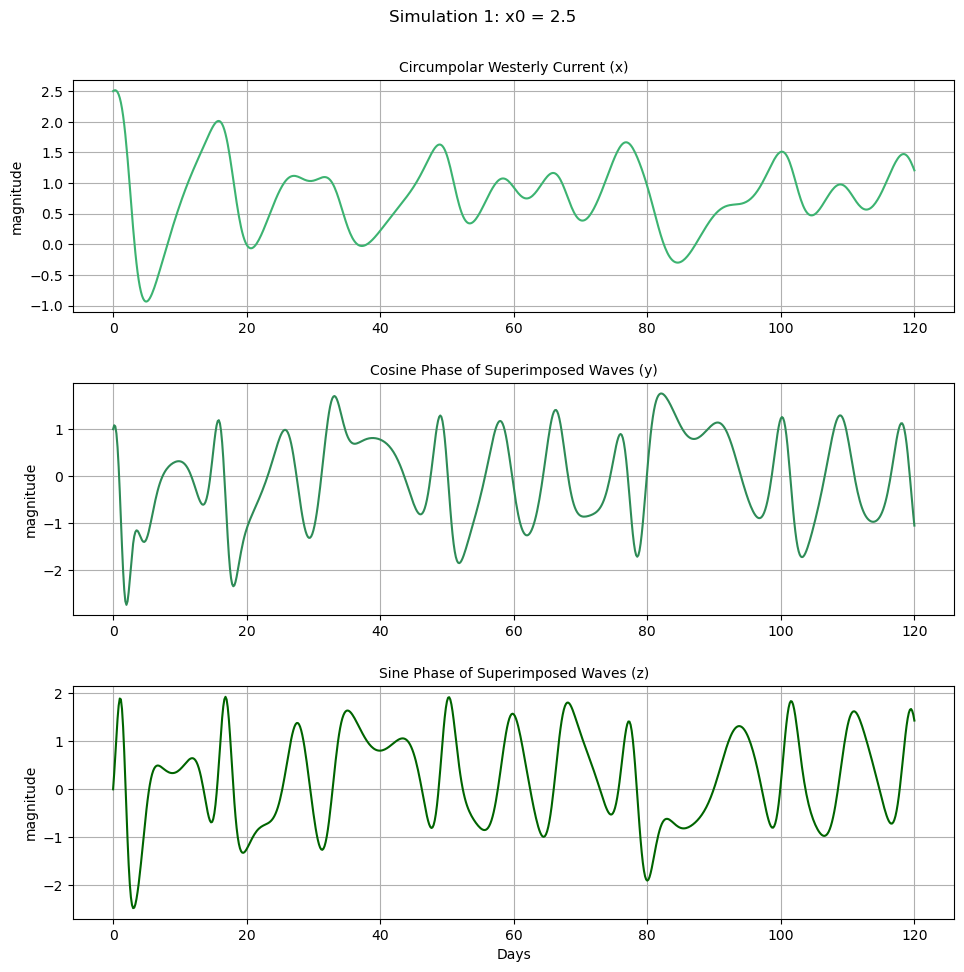

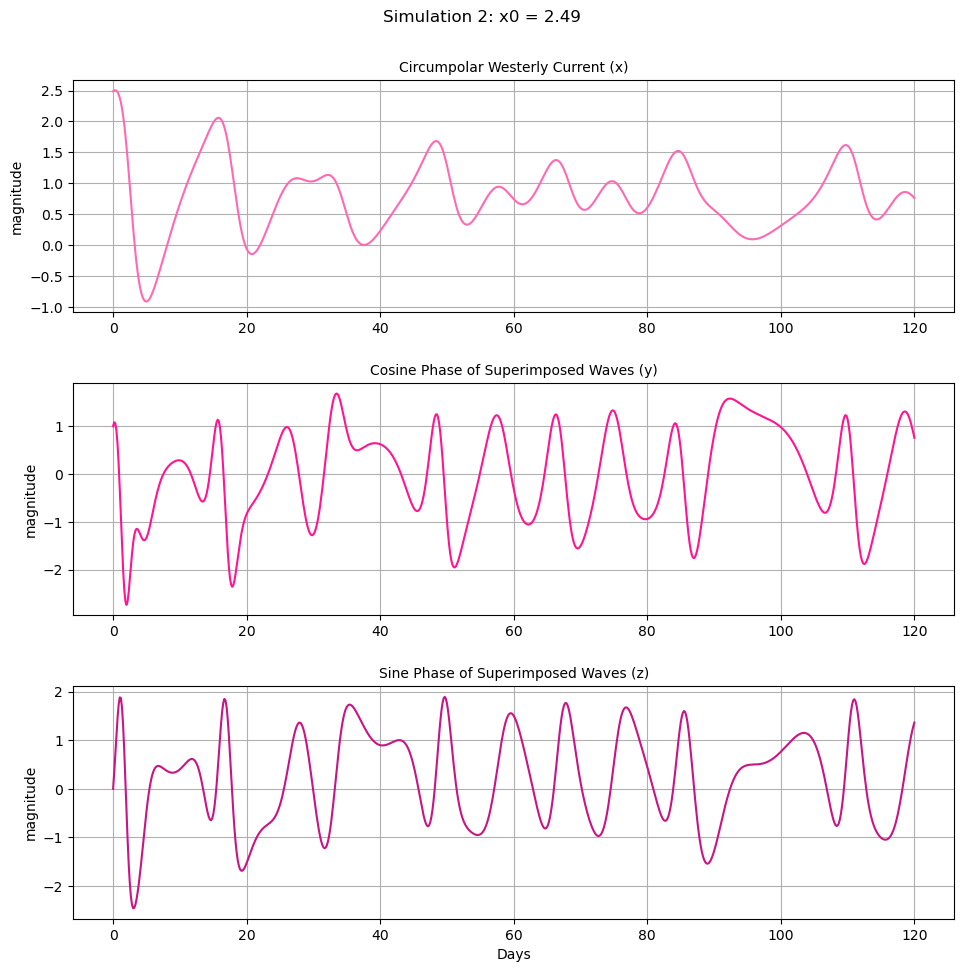

In [5]:
## make plots
## first simulation (x0=2.5)
fig1 = plt.figure(3,figsize=(10,10))
fig1.suptitle('Simulation 1: x0 = 2.5') 

ax1 = fig1.add_subplot(311)
ax1.grid(True)
ax1.set_title('Circumpolar Westerly Current (x)',fontsize=10)
ax1.set_ylabel('magnitude')
ax1.plot(times,x,color='mediumseagreen')

ax2 = fig1.add_subplot(312)
ax2.grid(True)
ax2.set_title('Cosine Phase of Superimposed Waves (y)',fontsize=10)
ax2.set_ylabel('magnitude')
ax2.plot(times,y,color='seagreen')

ax3 = fig1.add_subplot(313)
ax3.grid(True)
ax3.set_title('Sine Phase of Superimposed Waves (z)',fontsize=10)
ax3.set_ylabel('magnitude')
ax3.plot(times,z,color='darkgreen')
ax3.set_xlabel('Days')

fig1.tight_layout(pad=2)
plt.show()
plt.close()

## second simulation (x0 = 2.49)
fig2 = plt.figure(3,figsize=(10,10))
fig2.suptitle('Simulation 2: x0 = 2.49') 

ax4 = fig2.add_subplot(311)
ax4.grid(True)
ax4.set_title('Circumpolar Westerly Current (x)',fontsize=10)
ax4.set_ylabel('magnitude')
ax4.plot(times,x2,color='hotpink')

ax5 = fig2.add_subplot(312)
ax5.grid(True)
ax5.set_title('Cosine Phase of Superimposed Waves (y)',fontsize=10)
ax5.set_ylabel('magnitude')
ax5.plot(times,y2,color='deeppink')


ax6 = fig2.add_subplot(313)
ax6.grid(True)
ax6.set_title('Sine Phase of Superimposed Waves (z)',fontsize=10)
ax6.set_ylabel('magnitude')
ax6.plot(times,z2,color='mediumvioletred')
ax6.set_xlabel('Days')

fig2.tight_layout(pad=2)
plt.show()

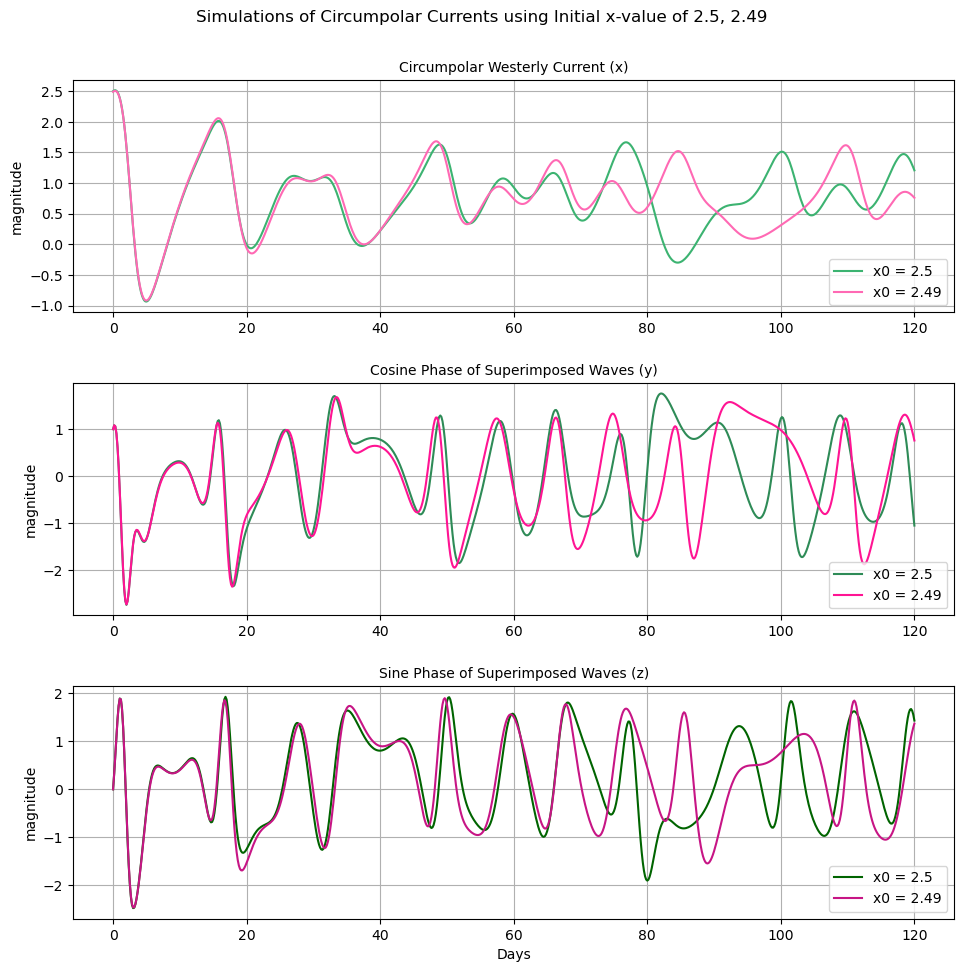

In [6]:
## for funsies, superimpose the plots on each other
fig3 = plt.figure(3,figsize=(10,10))
fig3.suptitle('Simulations of Circumpolar Currents using Initial x-value of 2.5, 2.49')

ax7 = fig3.add_subplot(311)
ax7.grid(True)
ax7.set_title('Circumpolar Westerly Current (x)',fontsize=10)
ax7.set_ylabel('magnitude')
ax7.plot(times,x,color='mediumseagreen')
ax7.plot(times,x2,color='hotpink')
ax7.legend(['x0 = 2.5','x0 = 2.49'],loc=4)

ax8 = fig3.add_subplot(312)
ax8.grid(True)
ax8.set_title('Cosine Phase of Superimposed Waves (y)',fontsize=10)
ax8.set_ylabel('magnitude')
ax8.plot(times,y,color='seagreen')
ax8.plot(times,y2,color='deeppink')
ax8.legend(['x0 = 2.5','x0 = 2.49'],loc=4)

ax9 = fig3.add_subplot(313)
ax9.grid(True)
ax9.set_title('Sine Phase of Superimposed Waves (z)',fontsize=10)
ax9.set_ylabel('magnitude')
ax9.plot(times,z,color='darkgreen')
ax9.plot(times,z2,color='mediumvioletred')
ax9.set_xlabel('Days')
ax9.legend(['x0 = 2.5','x0 = 2.49'],loc=4)

fig3.tight_layout(pad = 2)
plt.show()

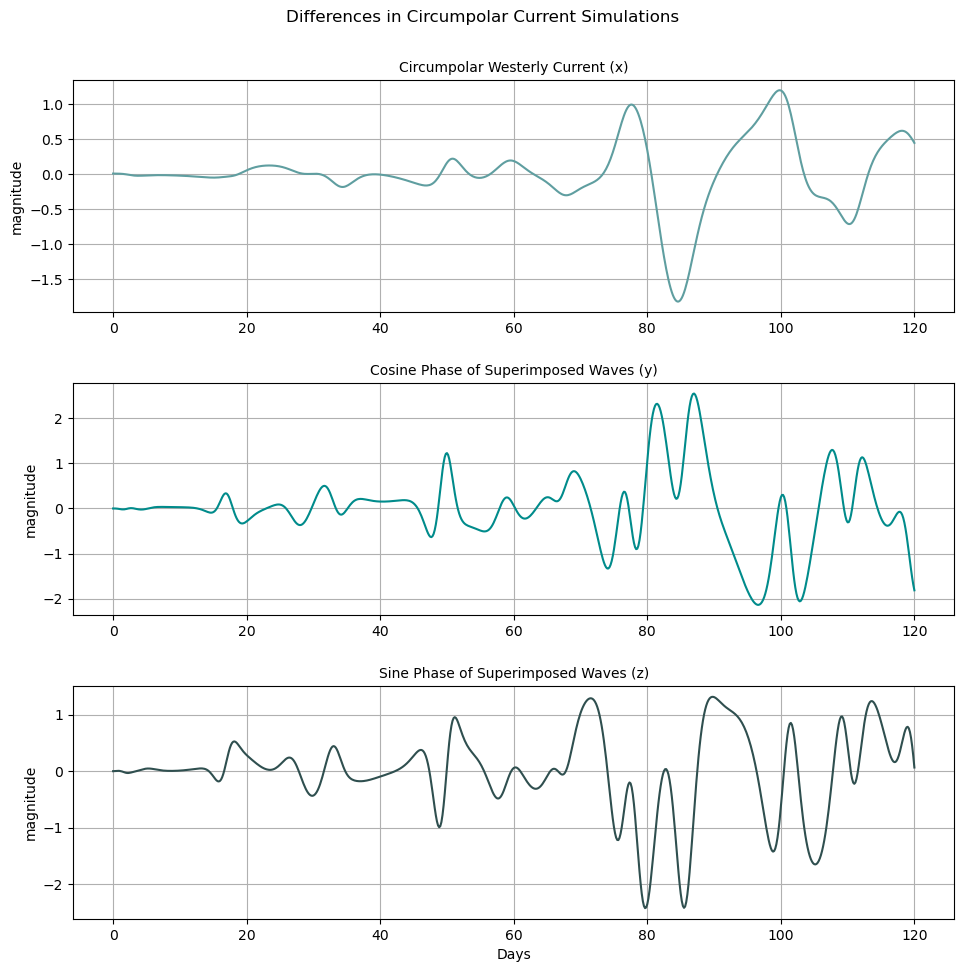

In [7]:
## difference plots
xdiff = x - x2
ydiff = y - y2
zdiff = z - z2

fig4 = plt.figure(3,figsize=(10,10))
fig4.suptitle('Differences in Circumpolar Current Simulations')

ax1 = fig4.add_subplot(311)
ax1.grid(True)
ax1.set_title('Circumpolar Westerly Current (x)',fontsize=10)
ax1.set_ylabel('magnitude')
ax1.plot(times,xdiff,color='cadetblue')

ax2 = fig4.add_subplot(312)
ax2.grid(True)
ax2.set_title('Cosine Phase of Superimposed Waves (y)',fontsize=10)
ax2.set_ylabel('magnitude')
ax2.plot(times,ydiff,color='darkcyan')

ax3 = fig4.add_subplot(313)
ax3.grid(True)
ax3.set_title('Sine Phase of Superimposed Waves (z)',fontsize=10)
ax3.set_ylabel('magnitude')
ax3.plot(times,zdiff,color='darkslategrey')
ax3.set_xlabel('Days')

fig4.tight_layout(pad=2)
plt.show()

In [8]:
### In a separate text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
'''
    1. The two simulations are not the same throughout the entire period.
    They begin to diverge at around 15-20 days into the simulation, but 
    there are small differences before that point.
    
    2. Small differences in initial conditions can grow into larger differences
    in final (and intermediate) results both in this simulation and in NWP models.
    Therefore, if initial conditions are not accurate and balanced, the model's 
    output may be wildly different than what it would be if the conditions *were*
    close to truth, and therefore, significantly less accurate.
    
'''

"\n    1. The two simulations are not the same throughout the entire period.\n    They begin to diverge at around 15-20 days into the simulation, but \n    there are small differences before that point.\n    \n    2. Small differences in initial conditions can grow into larger differences\n    in final (and intermediate) results both in this simulation and in NWP models.\n    Therefore, if initial conditions are not accurate and balanced, the model's \n    output may be wildly different than what it would be if the conditions *were*\n    close to truth, and therefore, significantly less accurate.\n    \n"